# Displacement field visualization

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

from loads import HalfBeam, Load
from constraints import DensityConstraint
from fesolvers import CooFESolver
from visprob import VisProblem

In [2]:
%matplotlib inline

In [3]:
# material properties
young = 1
poisson = 0.3

# constraints
volfrac = 0.4
xmin = 0.001
xmax = 1.0

# input parameters
nelx = 60
nely = 20

penal = 3.0
rmin = 5.4

delta = 0.02
loopy = math.inf

In [4]:
# element (local) stiffness matrix
def lk(young, poisson):
    e = young
    nu = poisson
    k = np.array([1/2-nu/6,1/8+nu/8,-1/4-nu/12,-1/8+3*nu/8,-1/4+nu/12,-1/8-nu/8,nu/6,1/8-3*nu/8])
    ke = e/(1-nu**2)* \
    np.array([ [k[0], k[1], k[2], k[3], k[4], k[5], k[6], k[7]],
               [k[1], k[0], k[7], k[6], k[5], k[4], k[3], k[2]],
               [k[2], k[7], k[0], k[5], k[6], k[3], k[4], k[1]],
               [k[3], k[6], k[5], k[0], k[7], k[2], k[1], k[4]],
               [k[4], k[5], k[6], k[7], k[0], k[1], k[2], k[3]],
               [k[5], k[4], k[3], k[2], k[1], k[0], k[7], k[6]],
               [k[6], k[3], k[4], k[1], k[2], k[7], k[0], k[5]],
               [k[7], k[2], k[1], k[4], k[3], k[6], k[5], k[0]] ]);

    return ke

In [5]:
# example loading scenario, half mbb-beam
class SamplePart(Load):
    def __init__(self, nelx, nely):
        super().__init__(nelx, nely)
        
    def force(self):
        f = super().force()
        # right force at node(row,col)
        row = 0
        col = 60
        f[(self.nely+1)*2*col + row*2 ]= 1.0
        return f

    def fixdofs(self):
        # left side fixed to a wall, lower right corner fixed to a point
        return ([x for x in range(0, self.dim*(self.nely+1), self.dim)] )#+ [self.dim*(self.nelx+1)*(self.nely+1)-1])

    def freedofs(self):
        return list(set(self.alldofs()) - set(self.fixdofs()))

C:\Users\fly2M\Anaconda3\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


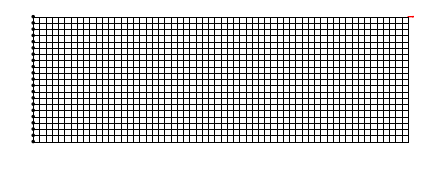

In [6]:
# loading/problem
load = SamplePart(nelx, nely)

# constraints
density_constraint = DensityConstraint(volume_frac = volfrac, density_min = xmin, density_max = xmax)

# visualize problem
vp = VisProblem()
vp.draw(load, density_constraint)

In [7]:
# optimizer
verbose = True
fesolver = CooFESolver(verbose = verbose)

In [8]:
# compute
x = np.ones((nely, nelx))*density_constraint.volume_frac()
xold = x.copy()

# element stiffness matrix
ke = lk(young, poisson)

# displacement via finite element analysis
u = fesolver.displace(load, x, ke, penal)



In [9]:
U = np.array([ux for i,ux in enumerate(u) if i % 2 == 0])
V = np.array([uy for i,uy in enumerate(u) if i % 2 == 1]) 



## plot


In [10]:
 def show_field(x, u, load):       
        
        U = np.array([ux for i,ux in enumerate(u) if i % 2 == 0])
        V = np.array([uy for i,uy in enumerate(u) if i % 2 == 1])         
                
        fig= plt.figure(2)
        ax = plt.gca()
        ax.axis('off')        
          
        ndx = np.array(load.alldofs()) // 2
        ndx = np.array([idx for i, idx in enumerate(ndx) if i%2 ==0])
        X = ndx  // (nely + 1)
        Y = nely - ndx % (nely + 1)        
        plt.ylim(-1, np.max(Y))
        M = np.hypot(U, V)
        plt.quiver(X,Y,U,V, color='red', units='width')
        #plt.quiver(X,Y,U,V,M,units='width', pivot='tip', width=0.025, scale=0.2)
        
        # Used to return the plot as an image rray
        fig.canvas.draw()       # draw the canvas, cache the renderer
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))        
        return #image        

In [11]:
 from scipy.cluster.vq import kmeans2
    

In [12]:
U=[0.8, 0.1...]
V=[0.6, 0.2,...]
X=[0,   0,....]
Y=[0,   1,...]

u_0 = [U[0],V[0]]
x_0 = [X[0],Y[0]]
u_i = [U[i],V[i]]
x_i = [X[i],Y[i]]
def distance(i,j):
    d = dis(x_i, x_j) + np.dot(u_i,u_j)
    return d



SyntaxError: invalid syntax (<ipython-input-12-c480c74e4243>, line 1)

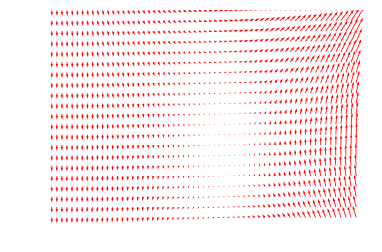

In [13]:
show_field(x,u,load)